In [1]:
from pysead import Truss_3D
import pandas as pd
%matplotlib widget

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
def pysead_blender_importer():
    nodes_sheet = pd.read_csv('nodes.csv')
    elements_sheet = pd.read_csv('bar_elements.csv')
    supports_sheet = pd.read_csv('supports.csv')
    forces_sheet = pd.read_csv('nodal_loads.csv')

    nodes = {}
    for i in range(len(nodes_sheet)):
        nodes.update({nodes_sheet['Node'][i]+1: [nodes_sheet['x_coord'][i], nodes_sheet['y_coord'][i], nodes_sheet['z_coord'][i]]})

    elements = {}
    for i in range(len(elements_sheet)):
        elements.update({elements_sheet['Element'][i]+1: [elements_sheet['Node_1'][i]+1, elements_sheet['Node_2'][i]+1]})

    support_array = [1,1,1]

    supports={}
    for i in range(len(supports_sheet)):
        supports.update({supports_sheet['Node'][i]+1: support_array})

    forces_array = [10,0,-10]

    forces={}
    for i in range(len(forces_sheet)):
        forces.update({forces_sheet['Node'][i]+1: forces_array})
    
    return(nodes, elements, supports, forces)

In [3]:
nodes, elements, supports, forces = pysead_blender_importer()

In [4]:
areas = {key: 0.002 for key in elements}
elasticity = {key: 200_000_000 for key in elements}

In [5]:
Truss = Truss_3D(nodes=nodes,
                elements=elements,
                supports=supports,
                forces=forces,
                elasticity=elasticity,
                cross_area=areas)

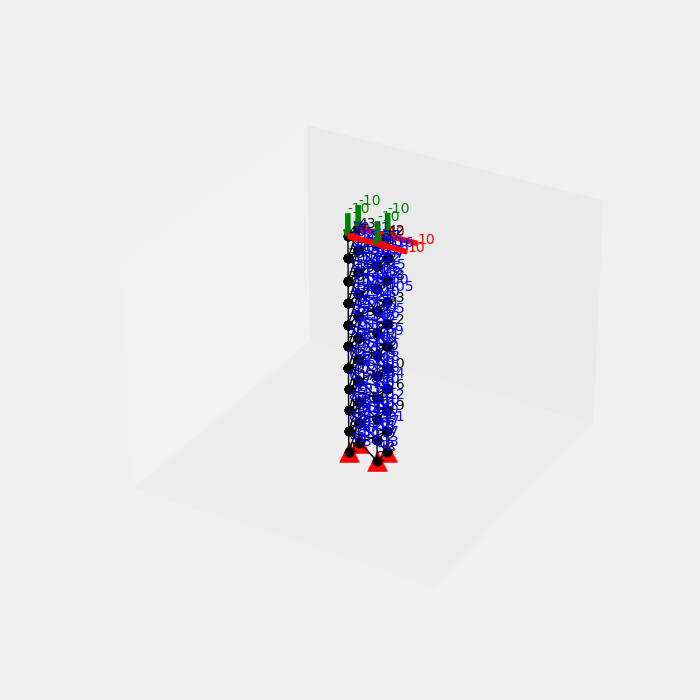

In [6]:
Truss.Draw_Truss_Setup(length_of_arrow=5)

In [7]:
Truss.Solve()

Positive Stress/Force is in Tension, Negative Stress/Force is in Compression


In [8]:
Truss.reactions_

{1: [0.0, 0.0, -190.0],
 2: [-20.0, 0.0, 210.0],
 3: [0.0, 0.0, 210.0],
 4: [-20.0, 0.0, -190.0]}

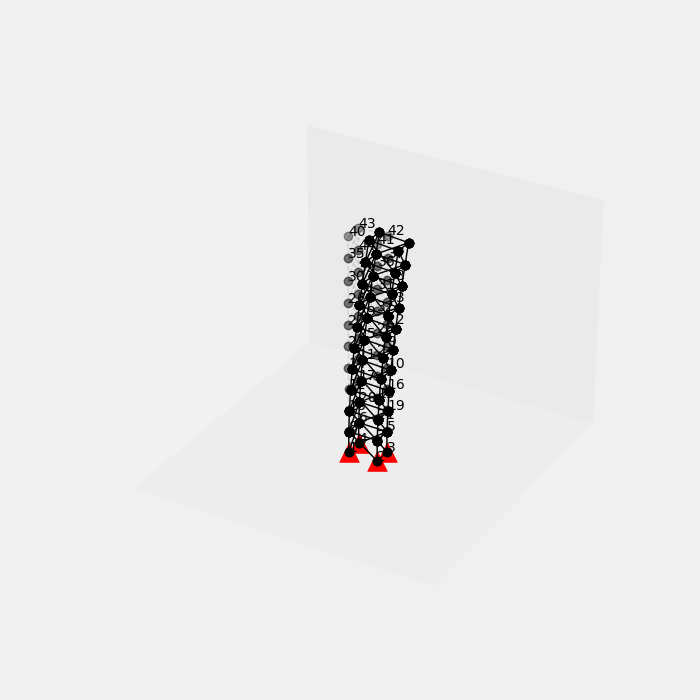

In [9]:
Truss.Draw_Truss_Displacements(magnification_factor=20)

In [10]:
Truss.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.0, 0.0, 0.0],
 4: [0.0, 0.0, 0.0],
 5: [0.00333, -0.00396, -0.00263],
 6: [0.00358, -0.00354, 0.00213],
 7: [0.00333, -0.00396, -0.00238],
 8: [0.00308, -0.00354, 0.00237],
 9: [0.05766, -0.01146, -0.01063],
 10: [0.03908, -0.01083, -0.009],
 11: [0.03933, -0.00917, 0.007],
 12: [0.02275, -0.00813, 0.00637],
 13: [0.03833, -0.01083, -0.008],
 14: [0.03808, -0.00917, 0.008],
 15: [0.023, -0.00937, -0.00638],
 16: [0.0235, -0.00937, -0.00713],
 17: [0.02375, -0.00813, 0.00563],
 18: [0.01091, -0.00625, 0.0045],
 19: [0.01141, -0.00708, -0.005],
 20: [0.01166, -0.00625, 0.004],
 21: [0.01116, -0.00708, -0.0045],
 22: [0.07874, -0.01125, -0.012],
 23: [0.05641, -0.00938, 0.00937],
 24: [0.05666, -0.01146, -0.00938],
 25: [0.05791, -0.00938, 0.00813],
 26: [0.10007, -0.00729, 0.01137],
 27: [0.07724, -0.00875, 0.0105],
 28: [0.07749, -0.01125, -0.0105],
 29: [0.07899, -0.00875, 0.009],
 30: [0.12441, -0.005, 0.012],
 31: [0.12466, -0.00833, -